<a href="https://colab.research.google.com/github/Devansharma/Time_Series_Analysis/blob/master/Time_Series_using_Prophet_Trend_Non_Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv')

In [25]:
df['Quarter'] = pd.to_datetime(df['Quarter'])

In [26]:
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [27]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Profits')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                     dict(count=1, label='1y', step='year', stepmode='backward'),
                     dict(count=2, label='2y', step='year', stepmode='backward'),
                     dict(count=3, label='3y', step='year', stepmode='backward'),
                     dict(step='all')
        ])
    )
)
fig.show()

In [28]:
from fbprophet import Prophet

In [29]:
amazon_df = df[['Quarter', 'Revenue']].rename({'Quarter': 'ds',
                                               'Revenue': 'y'}, axis='columns')

In [30]:
amazon_df

,ds,y
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700
...,...,...
56,2006-03-31,2279
57,2005-12-31,2977
58,2005-09-30,1858
59,2005-06-30,1753


In [31]:
train = amazon_df[(amazon_df['ds']>= '2005-03-31')&(amazon_df['ds']<='2019-03-31')]
test = amazon_df[(amazon_df['ds']>'2019-03-31')]

In [32]:
print(train.shape)
print(test.shape)

(57, 2)
(4, 2)


In [33]:
model = Prophet(interval_width=0.95)

In [34]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = model.make_future_dataframe(periods=4, freq='Q')
future.tail()

,ds
56,2019-03-31
57,2019-06-30
58,2019-09-30
59,2019-12-31
60,2020-03-31


In [36]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,61089.496702,57049.005878,65184.705397
57,2019-06-30,63195.117245,59203.903335,67296.131830
58,2019-09-30,66153.769212,61949.688135,70297.261038
59,2019-12-31,74249.538229,69885.139858,78565.141649
60,2020-03-31,70663.367667,66570.177933,74748.425351


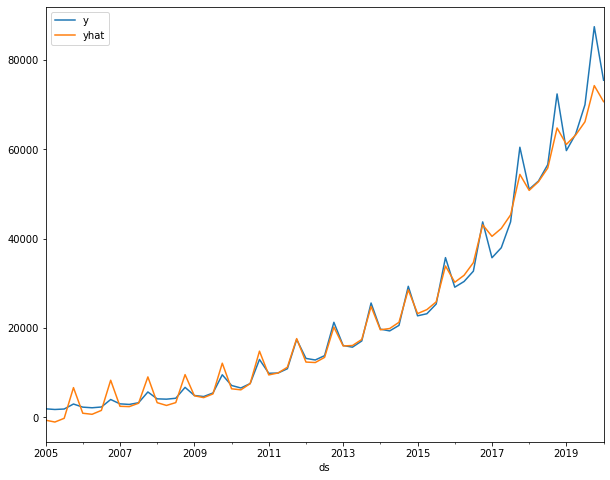

In [37]:
pd.concat([amazon_df.set_index('ds')['y'], forecast.set_index('ds')['yhat']],axis=1).plot()

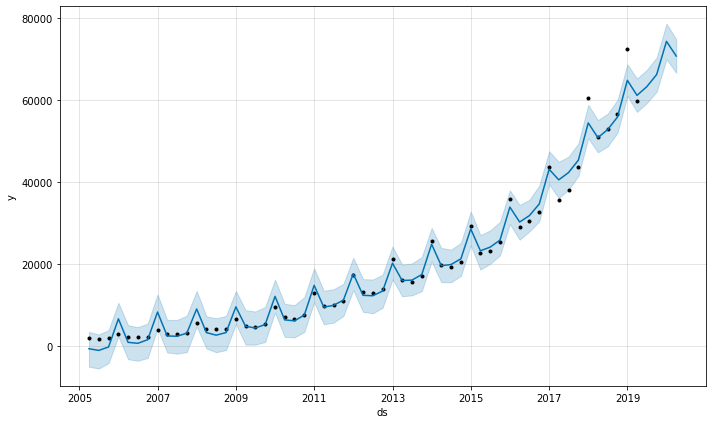

In [38]:
fig1 = model.plot(forecast)

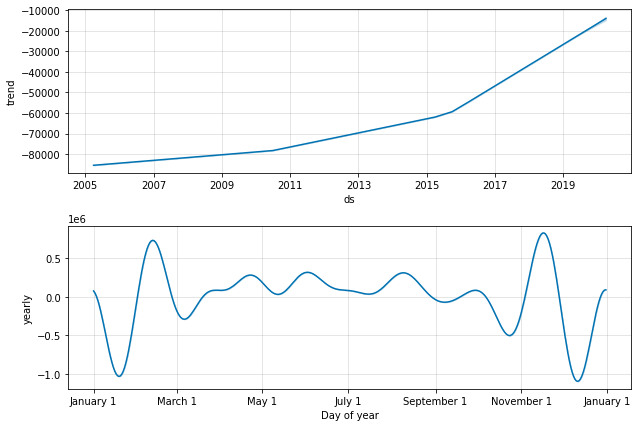

In [39]:
fig2 = model.plot_components(forecast)

In [40]:
holiday_sale = pd.DataFrame({
   'holiday': 'dec_jan_sale',
   'ds': pd.to_datetime(['2019-12-31', '2018-12-31', '2017-12-31',
                         '2016-12-31', '2015-12-31', '2014-12-31',
                         '2013-12-31', '2012-12-31', '2011-12-31', 
                         '2010-12-31', '2009-12-31', '2008-12-31',
                         '2007-12-31', '2006-12-31', '2005-12-31', ]),
  'lower_window':0,
  'upper_window':1, 
})

In [41]:
model2 = Prophet(interval_width=0.95, seasonality_mode='multiplicative',
                 holidays=holiday_sale)

In [43]:
model2.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
forecast = model2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,60105.339695,58349.724521,62035.761982
57,2019-06-30,62632.831894,60962.108533,64406.165972
58,2019-09-30,67797.199969,65946.888991,69646.820858
59,2019-12-31,89334.669448,87271.104390,91362.994875
60,2020-03-31,66853.826595,64629.726269,68886.782240


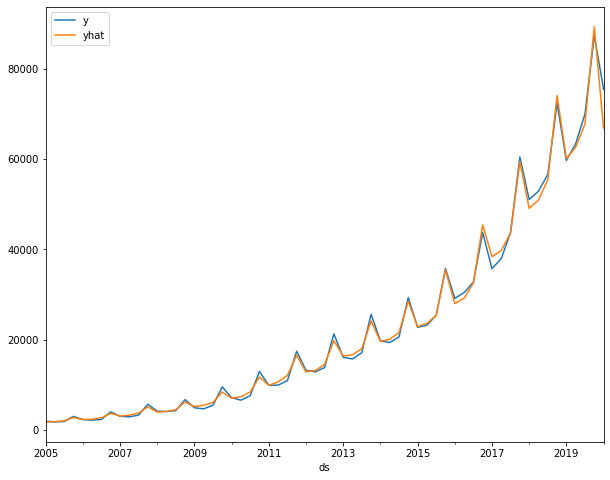

In [46]:
pd.concat([amazon_df.set_index('ds')['y'], forecast.set_index('ds')['yhat']],axis=1).plot()

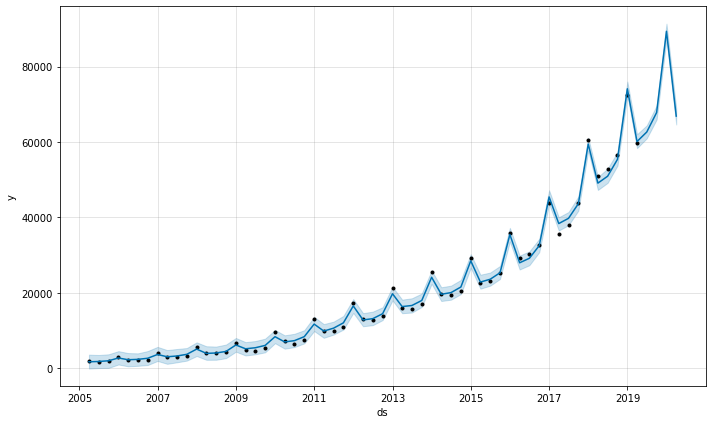

In [48]:
fig1 = model2.plot(forecast)

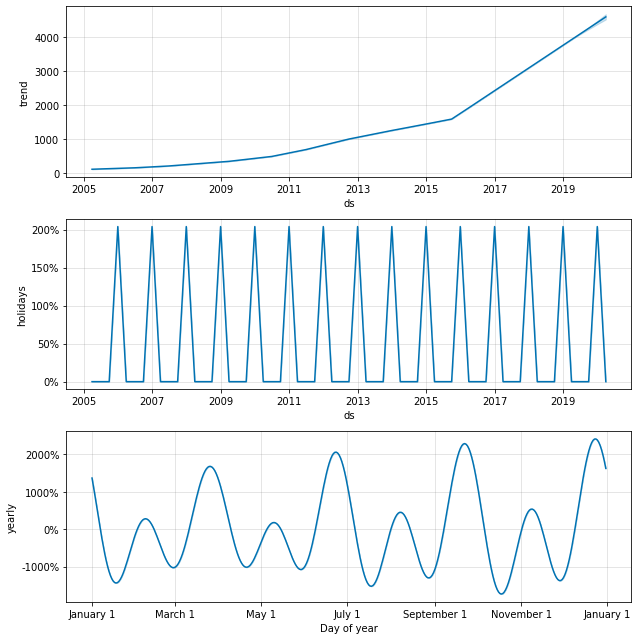

In [50]:
fig2 = model2.plot_components(forecast)